In [94]:
import numpy as np
import time

In [95]:
from qiskit import *
from qiskit.pulse import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter

In [96]:
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

/Users/pranavgokhale/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-ornl', group='bes-qis', project='argonne')>]

In [97]:
backend.defaults().cmd_def

[Command(name='cx', qubits=[0, 1], sequence=[PulseQobjInstruction(ch='d0', name='fc', phase=1.5707963267948966, t0=0), PulseQobjInstruction(ch='u1', name='fc', phase=1.5707963267948966, t0=0), PulseQobjInstruction(ch='d0', name='Ym_d0', t0=0), PulseQobjInstruction(ch='d1', name='X90p_d1', t0=0), PulseQobjInstruction(ch='d1', name='CR90p_d1', t0=10), PulseQobjInstruction(ch='u0', name='CR90p_u0', t0=10), PulseQobjInstruction(ch='d0', name='Xp_d0', t0=60), PulseQobjInstruction(ch='d1', name='CR90m_d1', t0=70), PulseQobjInstruction(ch='u0', name='CR90m_u0', t0=70)]),
 Command(name='cx', qubits=[1, 0], sequence=[PulseQobjInstruction(ch='d0', name='fc', phase=-1.5707963267948966, t0=0), PulseQobjInstruction(ch='u1', name='fc', phase=4.71238898038469, t0=0), PulseQobjInstruction(ch='d0', name='X90p_d0', t0=0), PulseQobjInstruction(ch='d1', name='fc', phase=-3.141592653589793, t0=0), PulseQobjInstruction(ch='u0', name='fc', phase=3.141592653589793, t0=0), PulseQobjInstruction(ch='u4', name='f

In [98]:
provider = IBMQ.get_provider(group='bes-qis')
backend = provider.get_backend('ibmq_boeblingen')
system = pulse.PulseChannelSpec.from_backend(backend)
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)

In [99]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='610px', min_width='610px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [259]:
system.qubits[13].controls

(ControlChannel(0),
 ControlChannel(1),
 ControlChannel(2),
 ControlChannel(3),
 ControlChannel(4),
 ControlChannel(5),
 ControlChannel(6),
 ControlChannel(7),
 ControlChannel(8),
 ControlChannel(9),
 ControlChannel(10),
 ControlChannel(11),
 ControlChannel(12),
 ControlChannel(13),
 ControlChannel(14),
 ControlChannel(15),
 ControlChannel(16),
 ControlChannel(17),
 ControlChannel(18),
 ControlChannel(19),
 ControlChannel(20),
 ControlChannel(21),
 ControlChannel(22),
 ControlChannel(23),
 ControlChannel(24),
 ControlChannel(25),
 ControlChannel(26),
 ControlChannel(27),
 ControlChannel(28),
 ControlChannel(29),
 ControlChannel(30),
 ControlChannel(31),
 ControlChannel(32),
 ControlChannel(33),
 ControlChannel(34),
 ControlChannel(35),
 ControlChannel(36),
 ControlChannel(37),
 ControlChannel(38),
 ControlChannel(39),
 ControlChannel(40),
 ControlChannel(41),
 ControlChannel(42),
 ControlChannel(43),
 ControlChannel(44),
 ControlChannel(45))

----

In [33]:
qr = QuantumRegister(20)
cr = ClassicalRegister(20)
circ = QuantumCircuit(qr, cr)

circ.h(0)
circ.h(1)

circ.cx(0, 1)
phi = np.pi/2
circ.rz(phi, 1)
circ.cx(0, 1)

theta = np.pi/8
circ.rx(theta, 0)
circ.rx(theta, 1)

circ.measure(qr, cr)
print(circ)

                                                                ┌───┐     »
 q2_0: |0>──────────────────────────────────────────────────────┤ H ├──■──»
                                                                ├───┤┌─┴─┐»
 q2_1: |0>──────────────────────────────────────────────────────┤ H ├┤ X ├»
          ┌─┐                                                   └───┘└───┘»
 q2_2: |0>┤M├─────────────────────────────────────────────────────────────»
          └╥┘┌─┐                                                          »
 q2_3: |0>─╫─┤M├──────────────────────────────────────────────────────────»
           ║ └╥┘┌─┐                                                       »
 q2_4: |0>─╫──╫─┤M├───────────────────────────────────────────────────────»
           ║  ║ └╥┘┌─┐                                                    »
 q2_5: |0>─╫──╫──╫─┤M├────────────────────────────────────────────────────»
           ║  ║  ║ └╥┘┌─┐                                                 »
 q2_6: |0>─╫

In [7]:
job = execute(circ, backend=backend)
print(job.job_id())

5d8565bc1765500018c3deee


In [12]:
job_id = '5d8565bc1765500018c3deee'
job = backend.retrieve_job(job_id)
job_monitor(job)

Job Status: job has successfully run


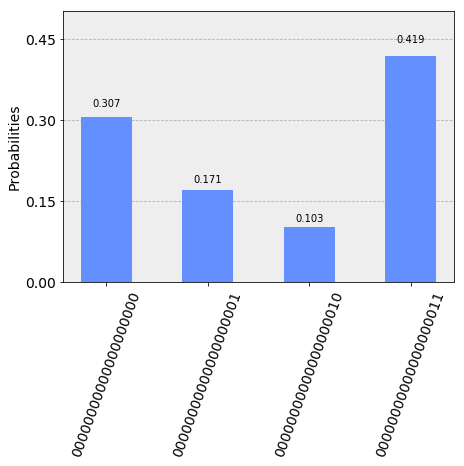

In [14]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items() if value > 30}
plot_histogram(counts)

# should see 9.78% each for 00 and 11, 40.22% each for 01 and 10
# https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B%22H%22%2C%22H%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C%7B%22id%22%3A%22Z%5Eft%22%2C%22arg%22%3A%22pi%2F2%22%7D%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B%7B%22id%22%3A%22X%5Eft%22%2C%22arg%22%3A%22pi%2F8%22%7D%2C%7B%22id%22%3A%22X%5Eft%22%2C%22arg%22%3A%22pi%2F8%22%7D%5D%5D%7D

-----

In [82]:
cmd_def.get('u3', [3], P0=0, P1=1,P2=2)
cmd_def._cmd_dict['u3'][]

{(0,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b966f28>,
 (1,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b96bd68>,
 (2,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b974668>,
 (3,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b9789e8>,
 (4,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b9832e8>,
 (5,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b988128>,
 (6,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b98b4a8>,
 (7,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x11b98cd68>,
 (8,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x1a245fc668>,
 (9,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x1a24600f28>,
 (10,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x1a246095f8>,
 (11,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x1a2460bcf8>,
 (12,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x1a24615ac8>,
 (13,): <qiskit.pulse.schedule.ParameterizedSchedule at 0x1a2461d898>,
 (14,): <qiskit.pulse.sc

In [55]:
cmd_def.get('cx', [0, 1]).instructions

((0, FrameChange(fc346, phase=1.571)),
 (0, FrameChange(fc347, phase=1.571)),
 (0, SamplePulse(Ym_d0, duration=10)),
 (0, SamplePulse(X90p_d1, duration=10)),
 (10, SamplePulse(CR90p_u0, duration=21)),
 (10, SamplePulse(CR90p_d1, duration=50)),
 (60, SamplePulse(Xp_d0, duration=10)),
 (70, SamplePulse(CR90m_u0, duration=21)),
 (70, SamplePulse(CR90m_d1, duration=50)))

In [60]:
cmd_def.get('cx', [1, 0]).instructions

((0, FrameChange(fc348, phase=-1.571)),
 (0, FrameChange(fc351, phase=3.142)),
 (0, FrameChange(fc349, phase=4.712)),
 (0, FrameChange(fc350, phase=-3.142)),
 (0, FrameChange(fc352, phase=3.142)),
 (0, FrameChange(fc353, phase=3.142)),
 (0, SamplePulse(X90p_d0, duration=10)),
 (0, SamplePulse(Y90p_d1, duration=10)),
 (10, SamplePulse(CR90p_u0, duration=21)),
 (10, SamplePulse(CR90p_d1, duration=50)),
 (60, SamplePulse(Xp_d0, duration=10)),
 (70, SamplePulse(CR90m_u0, duration=21)),
 (70, SamplePulse(CR90m_d1, duration=50)),
 (120, FrameChange(fc355, phase=4.712)),
 (120, FrameChange(fc354, phase=-1.571)),
 (120, FrameChange(fc356, phase=4.712)),
 (120, FrameChange(fc357, phase=4.712)),
 (120, SamplePulse(Y90m_d0, duration=10)),
 (120, SamplePulse(X90p_d1, duration=10)))

In [63]:
hh.instructions

((0, FrameChange(fc754, phase=-3.142)),
 (0, FrameChange(fc759, phase=-3.142)),
 (0, FrameChange(fc755, phase=-3.142)),
 (0, FrameChange(fc758, phase=-3.142)),
 (0, FrameChange(fc760, phase=-3.142)),
 (0, FrameChange(fc761, phase=-3.142)),
 (0, SamplePulse(Y90p_d0, duration=10)),
 (0, SamplePulse(Y90p_d1, duration=10)),
 (10, FrameChange(fc756, phase=-0.000)),
 (10, FrameChange(fc763, phase=-0.000)),
 (10, FrameChange(fc757, phase=-0.000)),
 (10, FrameChange(fc762, phase=-0.000)),
 (10, FrameChange(fc764, phase=-0.000)),
 (10, FrameChange(fc765, phase=-0.000)))

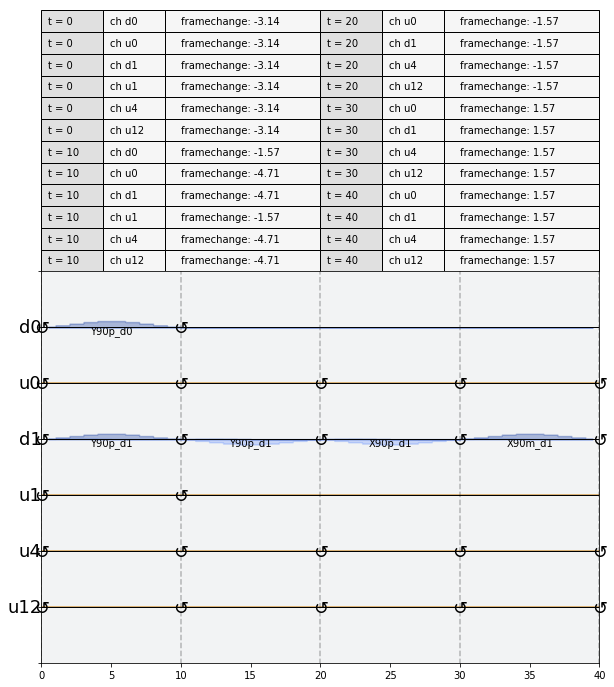

In [35]:
schedule = pulse.Schedule(name='CR Optimized')

# H H
hh = cmd_def.get('u2', qubits=[0], P0=0, P1=np.pi) | cmd_def.get('u2', qubits=[1], P0=0, P1=np.pi)

# RZ(phi) RZ(phi)
rzrz = cmd_def.get('u1', qubits=[0], P0=phi) | cmd_def.get('u1', qubits=[1], P0=phi)

# H
h = cmd_def.get('u2', qubits=[1], P0=0, P1=np.pi)

# RX(-phi)
rxminusphi = cmd_def.get('u3', qubits=[1], P0=-phi, P1=-np.pi/2, P2=np.pi/2)

# CR(phi)
crphi = cmd_def.get('cr')


schedule = hh + rzrz + h + rxminusphi + crphi + h


#measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])
#schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [32]:
job = execute(schedule, backend=backend)
print(job.job_id())

5d8569be01bf92001948d711


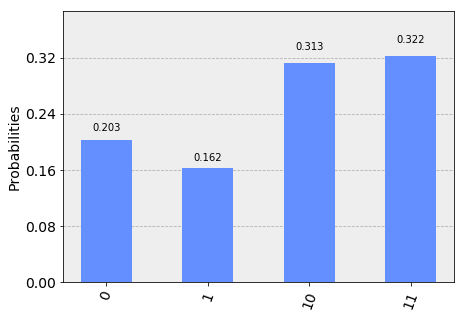

In [39]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items() if value > 30}
plot_histogram(counts)

# should see 9.78% each for 00 and 11, 40.22% each for 01 and 10
# https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B%22H%22%2C%22H%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C%7B%22id%22%3A%22Z%5Eft%22%2C%22arg%22%3A%22pi%2F2%22%7D%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B%7B%22id%22%3A%22X%5Eft%22%2C%22arg%22%3A%22pi%2F8%22%7D%2C%7B%22id%22%3A%22X%5Eft%22%2C%22arg%22%3A%22pi%2F8%22%7D%5D%5D%7D

In [141]:
backend.defaults().cmd_def

[Command(name='cx', qubits=[0, 1], sequence=[PulseQobjInstruction(ch='d0', name='fc', phase=1.5707963267948966, t0=0), PulseQobjInstruction(ch='u1', name='fc', phase=1.5707963267948966, t0=0), PulseQobjInstruction(ch='d0', name='Ym_d0', t0=0), PulseQobjInstruction(ch='d1', name='X90p_d1', t0=0), PulseQobjInstruction(ch='d1', name='CR90p_d1', t0=10), PulseQobjInstruction(ch='u0', name='CR90p_u0', t0=10), PulseQobjInstruction(ch='d0', name='Xp_d0', t0=60), PulseQobjInstruction(ch='d1', name='CR90m_d1', t0=70), PulseQobjInstruction(ch='u0', name='CR90m_u0', t0=70)]),
 Command(name='cx', qubits=[1, 0], sequence=[PulseQobjInstruction(ch='d0', name='fc', phase=-1.5707963267948966, t0=0), PulseQobjInstruction(ch='u1', name='fc', phase=4.71238898038469, t0=0), PulseQobjInstruction(ch='d0', name='X90p_d0', t0=0), PulseQobjInstruction(ch='d1', name='fc', phase=-3.141592653589793, t0=0), PulseQobjInstruction(ch='u0', name='fc', phase=3.141592653589793, t0=0), PulseQobjInstruction(ch='u4', name='f

In [187]:
X0_schedule = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library).get('x', [0])
X0_schedule.instructions[0][1].channels

(DriveChannel(0),)

In [182]:
from qiskit.pulse import pulse_lib
new_X_instr = pulse_lib.gaussian(duration=10, amp=0.151, sigma=2.44, name='gaussian')

In [189]:
new_X_instruction = new_X_instr.to_instruction(X0_schedule.instructions[0][1].channels[0])

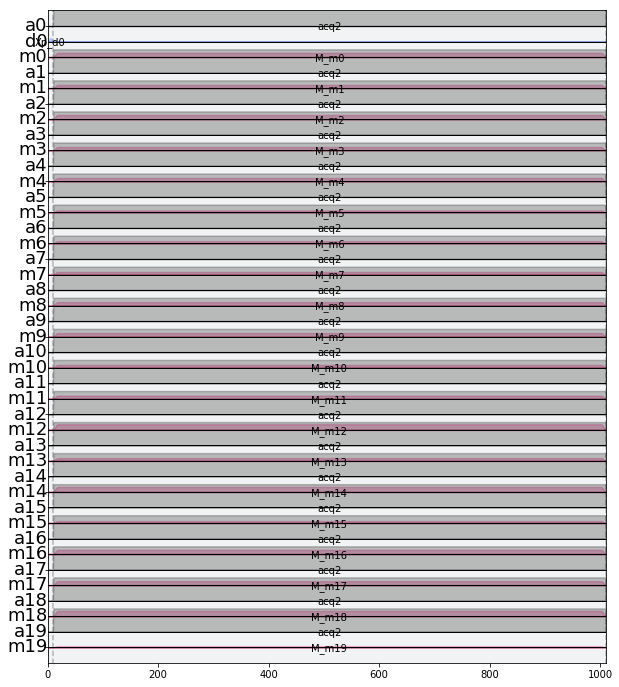

In [190]:
schedule = pulse.Schedule(name='CR Optimized')

schedule += X0_schedule
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [192]:
job = execute(schedule, backend=backend)
print(job.job_id())

5d87efb74a13e1001863a799


In [219]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items()}
sum({key: value for (key,value) in counts.items() if key[-1] == '1'}.values())
#plot_histogram(counts)

885

In [203]:
schedule = pulse.Schedule(name='CR Optimized')

schedule += new_X_instruction
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])
schedule |= measure << schedule.duration
schedule.instructions

((0, SamplePulse(gaussian, duration=10)),
 (10, Acquire(acq2, duration=1000, kernel=None, discriminator=None)),
 (10, SamplePulse(M_m0, duration=1000)),
 (10, SamplePulse(M_m1, duration=1000)),
 (10, SamplePulse(M_m2, duration=1000)),
 (10, SamplePulse(M_m3, duration=1000)),
 (10, SamplePulse(M_m4, duration=1000)),
 (10, SamplePulse(M_m5, duration=1000)),
 (10, SamplePulse(M_m6, duration=1000)),
 (10, SamplePulse(M_m7, duration=1000)),
 (10, SamplePulse(M_m8, duration=1000)),
 (10, SamplePulse(M_m9, duration=1000)),
 (10, SamplePulse(M_m10, duration=1000)),
 (10, SamplePulse(M_m11, duration=1000)),
 (10, SamplePulse(M_m12, duration=1000)),
 (10, SamplePulse(M_m13, duration=1000)),
 (10, SamplePulse(M_m14, duration=1000)),
 (10, SamplePulse(M_m15, duration=1000)),
 (10, SamplePulse(M_m16, duration=1000)),
 (10, SamplePulse(M_m17, duration=1000)),
 (10, SamplePulse(M_m18, duration=1000)),
 (10, SamplePulse(M_m19, duration=1000)))

In [204]:
job = execute(schedule, backend=backend)
print(job.job_id())

5d88e930194e3500196c5f9a


915


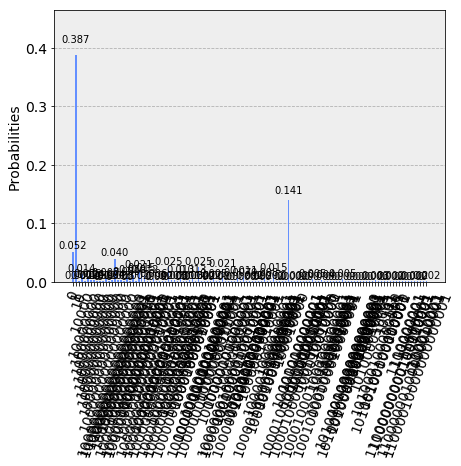

In [247]:
job = backend.retrieve_job('5d88e930194e3500196c5f9a')
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items()}
print(sum({key: value for (key,value) in counts.items() if key[-1] == '1'}.values()))
plot_histogram(counts)

In [221]:
small_X_instr = pulse_lib.gaussian(duration=10, amp=0.051, sigma=2.44, name='gaussian')
small_X_instruction = small_X_instr.to_instruction(X0_schedule.instructions[0][1].channels[0])

In [223]:
schedule = pulse.Schedule(name='small x instruction')

schedule += small_X_instruction
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])
schedule |= measure << schedule.duration
schedule.instructions

((0, SamplePulse(gaussian, duration=10)),
 (10, Acquire(acq2, duration=1000, kernel=None, discriminator=None)),
 (10, SamplePulse(M_m0, duration=1000)),
 (10, SamplePulse(M_m1, duration=1000)),
 (10, SamplePulse(M_m2, duration=1000)),
 (10, SamplePulse(M_m3, duration=1000)),
 (10, SamplePulse(M_m4, duration=1000)),
 (10, SamplePulse(M_m5, duration=1000)),
 (10, SamplePulse(M_m6, duration=1000)),
 (10, SamplePulse(M_m7, duration=1000)),
 (10, SamplePulse(M_m8, duration=1000)),
 (10, SamplePulse(M_m9, duration=1000)),
 (10, SamplePulse(M_m10, duration=1000)),
 (10, SamplePulse(M_m11, duration=1000)),
 (10, SamplePulse(M_m12, duration=1000)),
 (10, SamplePulse(M_m13, duration=1000)),
 (10, SamplePulse(M_m14, duration=1000)),
 (10, SamplePulse(M_m15, duration=1000)),
 (10, SamplePulse(M_m16, duration=1000)),
 (10, SamplePulse(M_m17, duration=1000)),
 (10, SamplePulse(M_m18, duration=1000)),
 (10, SamplePulse(M_m19, duration=1000)))

In [224]:
job = execute(schedule, backend=backend)
print(job.job_id())

5d88f13f4a13e1001863a982


277


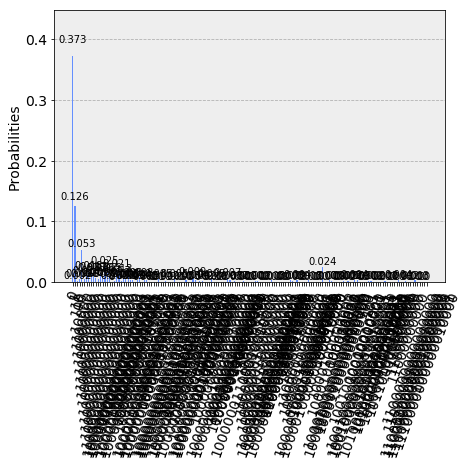

In [225]:
job = backend.retrieve_job('5d88f13f4a13e1001863a982')
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items()}
print(sum({key: value for (key,value) in counts.items() if key[-1] == '1'}.values()))
plot_histogram(counts)

In [226]:
wide_X_instr = pulse_lib.gaussian(duration=10, amp=0.151, sigma=6.44, name='gaussian')
wide_X_instruction = wide_X_instr.to_instruction(X0_schedule.instructions[0][1].channels[0])

In [227]:
schedule = pulse.Schedule(name='small x instruction')

schedule += small_X_instruction
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])
schedule |= measure << schedule.duration
schedule.instructions
job = execute(schedule, backend=backend)
print(job.job_id())

5d88f43aa77e8e00199f3fc2


292


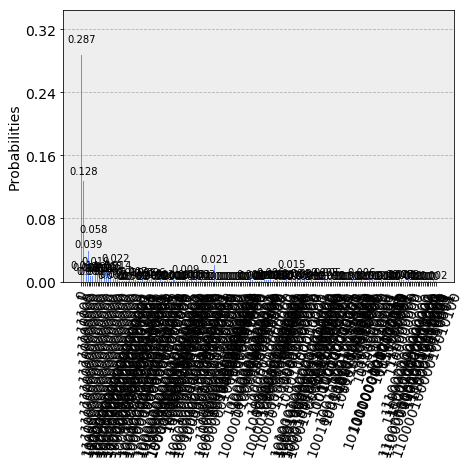

In [228]:
job = backend.retrieve_job('5d88f43aa77e8e00199f3fc2')
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items()}
print(sum({key: value for (key,value) in counts.items() if key[-1] == '1'}.values()))
plot_histogram(counts)